

### This is a kaggle notebook that will use data analytics tools and concepts to anaylse the cryptocurrency datasets. The first dataset consists of historical bitcoin prices from 2010 to 2021 as a csv file taken from the [top-50 historical prices dataset][1]. The [second dataset][2] has information on the transaction fees and minor reveune from 2009 to 2022

### Both datasets were resampled and shortened to have a sample range between 2018 and 2022. 

[1]: https://www.kaggle.com/datasets/odins0n/top-50-cryptocurrency-historical-prices
[2]: https://www.kaggle.com/datasets/muhammadkhoirulwiro/blockchain-transaction-and-miner-revenue

![Bitcoin logo][1]

[1]: https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Bitcoin.svg/480px-Bitcoin.svg.png

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bitcoinhistoricalprices/Bitcoin.csv
/kaggle/input/transactionfeesandminerrevenue20182022/Transactions Fees and Miner Revenue(2018-2022).csv


Import pyplot from **matplotlib** library to help with plotting graphs.

Using **pandas as pd**, both csv files are read and placed into variables as dataframes: bitcoindf and TFMR (**T**ransfer**F**ees&**M**iner**R**evenue)

One of the columns from bitcoindf 'SNo' is removed from the dataframe to make sure there is only one index column instead of two. 


In [2]:
import matplotlib.pyplot as plt

bitcoindf = pd.read_csv('../input/bitcoinhistoricalprices/Bitcoin.csv')
TFMR = pd.read_csv('../input/transactionfeesandminerrevenue20182022/Transactions Fees and Miner Revenue(2018-2022).csv')


bitcoindf = bitcoindf.drop(labels="SNo", axis=1)
bitcoindf.head()
TFMR = TFMR.rename(columns = {'Number of transactions' :  'Transactions', 
                       'Total value in USD of coinbase block rewards and transaction fees paid to miners.' : 'Block Rewards + Fees paid to miners (USD)',
                       'The total BTC value of all transaction fees paid to miners.' : 'Fees paid to miners (BTC)', 
                       'The total USD value of all transaction fees paid to miners.' : 'Fees paid to miners (USD)', 
                       'Average transaction fees in USD per transaction.' : 'Avg Fees per transaction (USD)',  
                       'miners revenue divided by the number of transactions (usd)' : 'Revenue/Transactions (USD)'})

### Bitcoin dataframe and 'Transactionfees&MinersRevenue' dataframe are merged based on the same recorded dates.  
### Columns are renamed from the 'Bitcoin' dataframe to make it clear that it is the Bitcoin prices/opens etc that are being looked at

In [3]:
TFMR.head()

,Date,month,day,year,Transactions,Block Rewards + Fees paid to miners (USD),Fees paid to miners (BTC),Fees paid to miners (USD),Avg Fees per transaction (USD),Revenue/Transactions (USD)
0,03/01/2018,1,3,2018,288429056,41037010.87,749.685473,1.132484e+07,28.276123,102.462144
1,06/01/2018,1,6,2018,289592587,46563789.98,694.477906,1.157201e+07,32.247758,129.759452
2,09/01/2018,1,9,2018,290665709,43234479.12,752.418203,1.161368e+07,30.999893,115.403963
3,12/01/2018,1,12,2018,291709927,38771602.28,617.635794,8.444052e+06,28.138306,129.199484
4,15/01/2018,1,15,2018,292512025,33038806.92,510.117618,7.067806e+06,25.830452,120.745723


In [4]:
bitcoindf.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,18/07/2010,0.1,0.0,0.1,0.1,80,0.0
1,19/07/2010,0.1,0.1,0.1,0.1,570,0.0
2,20/07/2010,0.1,0.1,0.1,0.1,260,0.0
3,21/07/2010,0.1,0.1,0.1,0.1,580,0.0
4,22/07/2010,0.1,0.1,0.1,0.1,2160,0.0


In [5]:
merged_df = TFMR.merge(bitcoindf, how="inner", on=['Date'])
merged_df = merged_df.rename(columns = {'Price' : 'Bitcoin Price', 'Open' : 'Bitcoin Open', 'High': 'Bitcoin High', 'Low' : 'Bitcoin Low'})
merged_df = merged_df.rename(columns = {'Number of transactions' :  'Transactions', 
                       'Total value in USD of coinbase block rewards and transaction fees paid to miners.' : 'Block Rewards + Fees paid to miners (USD)',
                       'The total BTC value of all transaction fees paid to miners.' : 'Fees paid to miners (BTC)', 
                       'The total USD value of all transaction fees paid to miners.' : 'Fees paid to miners (USD)', 
                       'Average transaction fees in USD per transaction.' : 'Avg Fees per transaction (USD)',  
                       'miners revenue divided by the number of transactions (usd)' : 'Revenue/Transactions (USD)'} )

In [6]:
merged_df.head()

,Date,month,day,year,Transactions,Block Rewards + Fees paid to miners (USD),Fees paid to miners (BTC),Fees paid to miners (USD),Avg Fees per transaction (USD),Revenue/Transactions (USD),Bitcoin Price,Bitcoin Open,Bitcoin High,Bitcoin Low,Vol.,Change %
0,03/01/2018,1,3,2018,288429056,41037010.87,749.685473,1.132484e+07,28.276123,102.462144,15156.6,14754.1,15435.0,14579.7,106540,2.73
1,06/01/2018,1,6,2018,289592587,46563789.98,694.477906,1.157201e+07,32.247758,129.759452,17172.3,16954.8,17252.8,16286.6,83930,1.28
2,09/01/2018,1,9,2018,290665709,43234479.12,752.418203,1.161368e+07,30.999893,115.403963,14778.5,14976.2,15324.6,14613.4,71400,-1.32
3,12/01/2018,1,12,2018,291709927,38771602.28,617.635794,8.444052e+06,28.138306,129.199484,13886.7,13529.2,14176.4,13410.0,82370,2.60
4,15/01/2018,1,15,2018,292512025,33038806.92,510.117618,7.067806e+06,25.830452,120.745723,13697.5,13695.5,14396.6,13475.4,73270,0.02


### Explanation of new columns

Bitcoin Open - Opening price of bitcoin on the day

Bitcoin High - Highest price of bitcoin on the day 

Bitcoin Low - Lowest price of bitcoin on the day

Vol - Volume of Bitcoin transactions on the day

Percentage Change from previous day ()

In [7]:
merged_df['Rolling Open Standard Deviation'] = merged_df['Bitcoin Open'].rolling(2).std()
merged_df['Rolling 50-day Standard Deviation'] = merged_df['Bitcoin Price'].rolling(17).std()
merged_df['Rolling 100-day Standard Deviation'] = merged_df['Bitcoin Price'].rolling(67).std()
merged_df['50 day moving average'] = merged_df['Bitcoin Price'].rolling(17).mean()
merged_df['100 day moving average'] = merged_df['Bitcoin Price'].rolling(67).mean()
merged_df.head()


,Date,month,day,year,Transactions,Block Rewards + Fees paid to miners (USD),Fees paid to miners (BTC),Fees paid to miners (USD),Avg Fees per transaction (USD),Revenue/Transactions (USD),...,Bitcoin Open,Bitcoin High,Bitcoin Low,Vol.,Change %,Rolling Open Standard Deviation,Rolling 50-day Standard Deviation,Rolling 100-day Standard Deviation,50 day moving average,100 day moving average
0,03/01/2018,1,3,2018,288429056,41037010.87,749.685473,1.132484e+07,28.276123,102.462144,...,14754.1,15435.0,14579.7,106540,2.73,NaN,NaN,NaN,NaN,NaN
1,06/01/2018,1,6,2018,289592587,46563789.98,694.477906,1.157201e+07,32.247758,129.759452,...,16954.8,17252.8,16286.6,83930,1.28,1556.129893,NaN,NaN,NaN,NaN
2,09/01/2018,1,9,2018,290665709,43234479.12,752.418203,1.161368e+07,30.999893,115.403963,...,14976.2,15324.6,14613.4,71400,-1.32,1399.081477,NaN,NaN,NaN,NaN
3,12/01/2018,1,12,2018,291709927,38771602.28,617.635794,8.444052e+06,28.138306,129.199484,...,13529.2,14176.4,13410.0,82370,2.60,1023.183512,NaN,NaN,NaN,NaN
4,15/01/2018,1,15,2018,292512025,33038806.92,510.117618,7.067806e+06,25.830452,120.745723,...,13695.5,14396.6,13475.4,73270,0.02,117.591858,NaN,NaN,NaN,NaN


### Rolling functions applied on the merged database
### Figure 1 - Rolling 3-day standard deviation
### Figure 2 - 50-day moving averages
### Figure 3 - 100-day moving averages

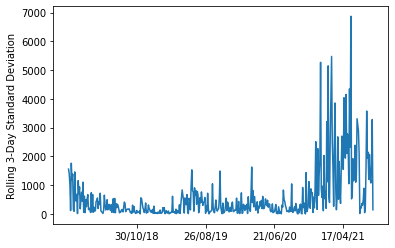

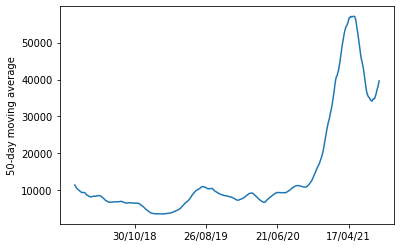

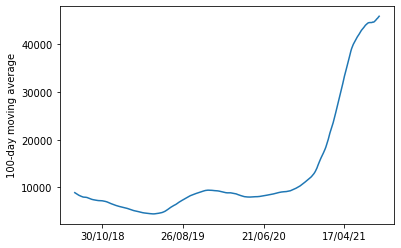

In [8]:

x = [100,200,300,400]
labels = ['30/10/18', '26/08/19', '21/06/20', '17/04/21']

plt.plot(merged_df['Rolling Open Standard Deviation'])
plt.ylabel("Rolling 3-Day Standard Deviation")
plt.xticks(x,labels)
plt.show()
plt.plot(merged_df['50 day moving average'])
plt.ylabel("50-day moving average")
plt.xticks(x,labels)
plt.show()
plt.plot(merged_df['100 day moving average'])
plt.ylabel("100-day moving average")
plt.xticks(x,labels)
plt.show()


In [9]:
corr_matrix = merged_df.corr()


<AxesSubplot:>

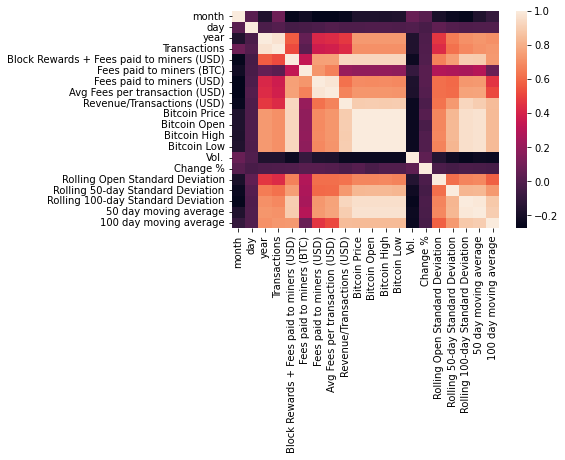

In [10]:
import seaborn as sns

sns.heatmap(corr_matrix)

# DBSCAN clustering. A density based clustering algorithm designed to handle noise and detect outliers

### DBSCAN module imported to use as an analytic tool for unsupervised learning to find patterns
### Linear Regression module imported as a type of predictive analysis to model relationships and describe data

### These tools will look at the relationship between the Average Transaction fees (USD) and the price of Bitcoin on that given day.

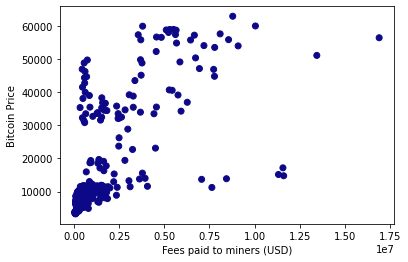

In [11]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = merged_df.loc[:,['Fees paid to miners (USD)', 'Bitcoin Price']].values
eps = 5
dbscan = DBSCAN(eps=eps, min_samples = 4).fit(x)
labels = dbscan.labels_

plt.scatter(x[:,0], x[:,1], c=labels, cmap="plasma")
plt.xlabel("Fees paid to miners (USD)")
plt.ylabel("Bitcoin Price")
plt.show()

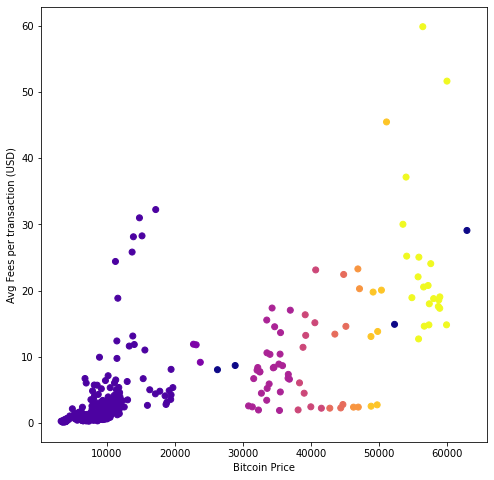

In [12]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = merged_df.loc[:,['Avg Fees per transaction (USD)', 'Bitcoin Price']].values
eps = 1050
dbscan = DBSCAN(algorithm='brute', leaf_size=30, p=None, n_jobs=None, metric="euclidean", eps=eps, min_samples = 3).fit(x)
clustering_labels = dbscan.fit_predict(x)
labels = dbscan.labels_

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)
plt.scatter(x[:,1], x[:,0], c=labels, cmap="plasma")
plt.ylabel("Avg Fees per transaction (USD)")
plt.xlabel("Bitcoin Price")
plt.show()

In [13]:
from sklearn.metrics import silhouette_score
db_score = silhouette_score(x,clustering_labels, metric='euclidean')
print("Silhouette score: ", db_score)

Silhouette score:  0.7050517249524746


In [14]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(merged_df.loc[:,['Fees paid to miners (USD)', 'Bitcoin Price']])
distances, indices = nbrs.kneighbors(merged_df.loc[:,['Fees paid to miners (USD)', 'Bitcoin Price']])

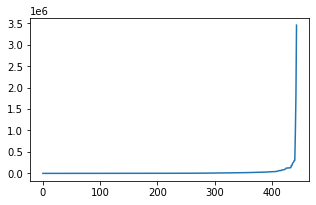

In [15]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

### Application of Linear Regression  

In [16]:
TFMR_transaction = merged_df[['Avg Fees per transaction (USD)','Bitcoin Price']]
TFMR_transaction.columns = ['AvgFees','Bitcoin Price']


# Drop first row to make number of rows 552 instead of 553 to satisfy train_test_split
TFMR_transaction = TFMR_transaction.iloc[1:, :]
TFMR_transaction.fillna(method ='ffill', inplace = True)

y = np.array(TFMR_transaction['AvgFees']).reshape(-1,1)
X = np.array(TFMR_transaction['Bitcoin Price']).reshape(-1,1)

X_train, x_test, y_train , y_test = train_test_split(X, y, test_size=0.5)
reg = LinearRegression()
reg.fit(X_train, y_train)
print(reg.score(x_test,y_test))

0.3329254602845745


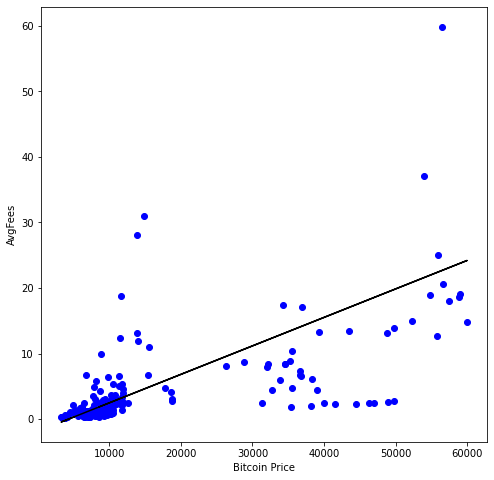

In [17]:
y_pred = reg.predict(x_test)
fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(8)
plt.scatter(x_test,y_test, color='b')
plt.ylabel("AvgFees")
plt.xlabel("Bitcoin Price")
plt.plot(x_test,y_pred, color='k')

plt.show()

### Retrieve p-values using the statsmodels api for the linear regression

In [18]:

import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print("p values: ")
for x in range(0,2):
    print(results.pvalues[x])
print(results.summary())



p values: 
0.0007357393330015405
2.2010481157135177e-75
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     507.8
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           2.20e-75
Time:                        13:08:00   Log-Likelihood:                -1342.6
No. Observations:                 443   AIC:                             2689.
Df Residuals:                     441   BIC:                             2697.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

# Summary

**coef** - shows the coefficient for each independent variable and intercept variable

**std error/t** - An estimate of the standard deviation of the corresponding variable's coefficient across all data points. 


**P>t** - How likely is it that the coefficient is measured through the model by chance? 

- The p-value of the variable (Fees paid to miners(USD)) is <0.05 (critical limit) which shows that this is a statistically significant



**Rsquared** - quality of the model fit - How much the independent variable is explained by the changes in the dependent variable
i.e a Rsquared value of 0.535 means that the model can explain 53.5% of the change in the dependent variable ()


**F-statistic** - Examines whether the group of variables is *statistically significant* by comparing this model with another model where the effect of the variables are reduced to 0.




#### With p-values being so small and below the critical limit, the null hypothesis(results are completely random) can be rejected and the idea that the change in transaction fees had a significant impact on the price of Bitcoin 


Robust Regression

### Implementation of the Isolation Forest to detect anomalies


In [19]:
from sklearn.ensemble import IsolationForest

ISF = IsolationForest(n_estimators=50,max_samples="auto",contamination="auto",max_features=1.0)
bp = np.array(merged_df['Bitcoin Price']).reshape(-1,1)
avg = np.array(merged_df['Avg Fees per transaction (USD)']).reshape(-1,1)
ISF.fit(avg)


IsolationForest(n_estimators=50)

In [20]:
df2 = merged_df[['Avg Fees per transaction (USD)','Bitcoin Price']]

In [21]:
df2['scores']=ISF.decision_function(df2[['Avg Fees per transaction (USD)']])
df2['anomaly']=ISF.predict(df2[['Avg Fees per transaction (USD)']])
df2.head(20)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

,Avg Fees per transaction (USD),Bitcoin Price,scores,anomaly
0,28.276123,15156.6,-0.167245,-1
1,32.247758,17172.3,-0.214918,-1
2,30.999893,14778.5,-0.197715,-1
3,28.138306,13886.7,-0.166342,-1
4,25.830452,13697.5,-0.149452,-1
5,24.411259,11245.4,-0.119067,-1
6,18.860830,11594.9,-0.056884,-1
7,12.409006,11452.3,-0.049167,-1
8,9.772750,11467.5,-0.049785,-1
9,7.158893,10166.0,-0.029225,-1


In [22]:
anomaly=df2.loc[df2['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly.head(54))

     Avg Fees per transaction (USD)  Bitcoin Price    scores  anomaly
0                         28.276123        15156.6 -0.167245       -1
1                         32.247758        17172.3 -0.214918       -1
2                         30.999893        14778.5 -0.197715       -1
3                         28.138306        13886.7 -0.166342       -1
4                         25.830452        13697.5 -0.149452       -1
5                         24.411259        11245.4 -0.119067       -1
6                         18.860830        11594.9 -0.056884       -1
7                         12.409006        11452.3 -0.049167       -1
8                          9.772750        11467.5 -0.049785       -1
9                          7.158893        10166.0 -0.029225       -1
10                         9.950891         8893.2 -0.045339       -1
11                         6.056735         6938.5 -0.005792       -1
56                         6.741130         6765.4 -0.005663       -1
121                 

In [23]:
df2_no_anomaly = df2.drop(df2[df2.anomaly == -1].index)

In [24]:
df2_no_anomaly.head()

,Avg Fees per transaction (USD),Bitcoin Price,scores,anomaly
12,4.161643,8164.2,0.006560,1
13,3.470591,8081.9,0.047398,1
14,2.926191,9476.3,0.040421,1
15,2.984184,11073.5,0.038626,1
16,3.027349,11238.7,0.033618,1


### Applying Linear Regression after removing anomalies

In [25]:
y1 = np.array(df2_no_anomaly['Avg Fees per transaction (USD)']).reshape(-1,1)
X1= np.array(df2_no_anomaly['Bitcoin Price']).reshape(-1,1)

X_train, x_test, y_train , y_test = train_test_split(X1, y1, test_size=0.5)
reg = LinearRegression()
reg.fit(X_train, y_train)
print(reg.score(x_test,y_test))

0.129884556858485


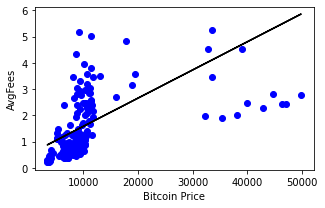

In [26]:
y_pred = reg.predict(x_test)
plt.scatter(x_test,y_test, color='b')
plt.ylabel("AvgFees")
plt.xlabel("Bitcoin Price")
plt.plot(x_test,y_pred, color='k')

plt.show()

In [27]:
X1 = sm.add_constant(X1)
model = sm.OLS(y1,X1)
results = model.fit()
print("p values: ")
for x in range(0,2):
    print(results.pvalues[x])
print(results.summary())

p values: 
1.2934363712516477e-12
5.3499840637316206e-24
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     118.8
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           5.35e-24
Time:                        13:08:01   Log-Likelihood:                -528.37
No. Observations:                 351   AIC:                             1061.
Df Residuals:                     349   BIC:                             1068.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

### The addition of the isolation forest to detect outliers had produced no improvement on the p-values or r-squared scores. In fact, the r-squared score was lower than before. The isolation forest algorithm detected well over 100 anomalies. Looking at the graph, it seems as if the forest removed anypoint that were outside the big cluster in the bottom-left corner, instead of taking in account every single data point on the graph.

In [28]:
import numpy as np
from sklearn.linear_model import HuberRegressor
from sklearn.datasets import make_regression

rng = np.random.RandomState(0)

X, y, coef = make_regression(n_samples=200, n_features=2, noise=4.0, coef=True, random_state=0)
X[:4] = rng.uniform(10,20, (4,2))
y[:4] = rng.uniform(10,20,4)

huber = HuberRegressor().fit(X,y)
huber.score(X,y)


-7.28460862351457

# K-Means Clustering

### A type of unsupervised learning algorithm that groups data based on each point's euclidean distance to a central point (centroid)
### It also partitions all points in the sample based on similarity (calculated by the euclidean distance)
#### Seaborn will be used to plot the colour coded clusters 
## Method 1
#### An elbow method will be used to help indicate how many clusters there are within the data

(444, 21)


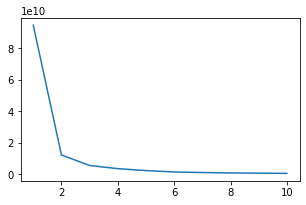

In [29]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import random
import seaborn as sns

df = merged_df
print(df.shape)
df = df[['Avg Fees per transaction (USD)', 'Bitcoin Price']]

wcss = []

for i in range(1, 11):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(df)
    wcss.append(clustering.inertia_)
    
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss);



##### The above plot shows a line graph that resembles an 'elbow' , that bends first at 2 then bends once again at 3. Indictating that there should be either 2 or 3 clusters in the data 

In [30]:
wcss_3 = []

for i in range(1, 4):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(df)
    wcss_3.append(clustering.inertia_)
    



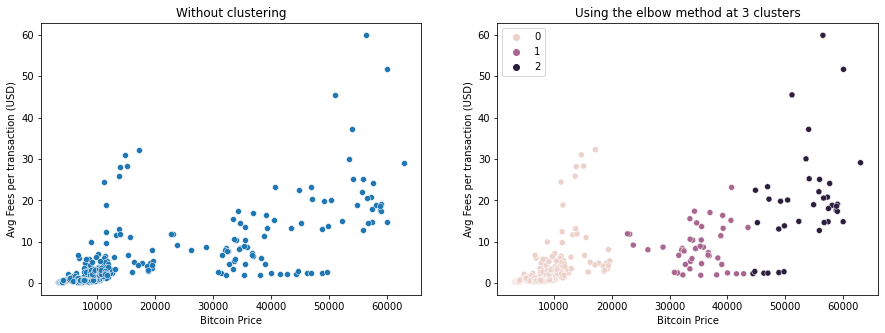

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, y='Avg Fees per transaction (USD)', x='Bitcoin Price').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, y='Avg Fees per transaction (USD)', x='Bitcoin Price', hue=clustering.labels_).set_title('Using the elbow method at 3 clusters');

##### The 2nd plot shows the locations of the three clusters

##### The 'legend' shows the colours of the three different clusters. 

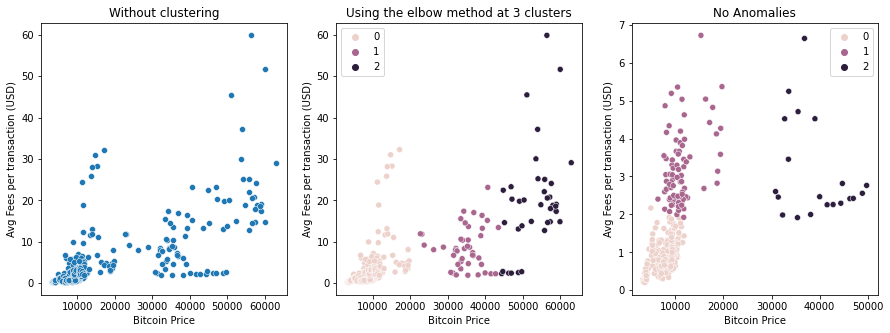

In [32]:
df_A = df2_no_anomaly[['Avg Fees per transaction (USD)', 'Bitcoin Price']]
x_std = StandardScaler().fit_transform(df_A)

wcss_A = []

for i in range(1, 4):
    A_clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    A_clustering.fit(x_std)
    wcss_A.append(A_clustering.inertia_)

centroids = A_clustering.cluster_centers_

"""plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')"""

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, y='Avg Fees per transaction (USD)', x='Bitcoin Price').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, y='Avg Fees per transaction (USD)', x='Bitcoin Price', hue=clustering.labels_).set_title('Using the elbow method at 3 clusters');
sns.scatterplot(ax=axes[2], data=df_A, y='Avg Fees per transaction (USD)', x='Bitcoin Price', hue=A_clustering.labels_).set_title('No Anomalies');


### A 3-D plot showing the K-means clustering with the added axis 'year' to show the progression over time

Text(0.5, 0, 'year')

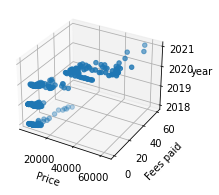

In [33]:
ax = plt.axes(projection='3d')
xdata = df['Bitcoin Price']
ydata = df['Avg Fees per transaction (USD)']
# 5 * np.random.random(444)
zdata = merged_df['year']
ax.scatter3D(xdata, ydata, zdata, cmap='Greens')

ax.set_xlabel('Price')
ax.set_ylabel('Fees paid')
ax.set_zlabel('year')

## Method 2 Silhouette Analysis

In [34]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df, clustering.labels_, metric='euclidean')
AnomalyScore = silhouette_score(df_A, A_clustering.labels_, metric='euclidean')
print("Silhouette score: %3f" % score )
print("Silhouette score (no anomalies): %3f" % AnomalyScore)


Silhouette score: 0.823319
Silhouette score (no anomalies): 0.339159


### Analyzing the Silhouette Score
- 1 : Samples are close to each other in their own clusters & seperate clusters are far away from each other
- 0 : Clusters are indifferent. Clusters are **overlapping** and in some cases, the samples are very close to the boundary of neighbouring clusters
- -1 : Samples might have been assigned to the wrong clusters



##### A silhouette score of 0.79 shows that the 3 clusters are of a significant distance away. Only a few samples are very close to each other.  

##### What score will be calculated with 2 clusters or 4 clusters?


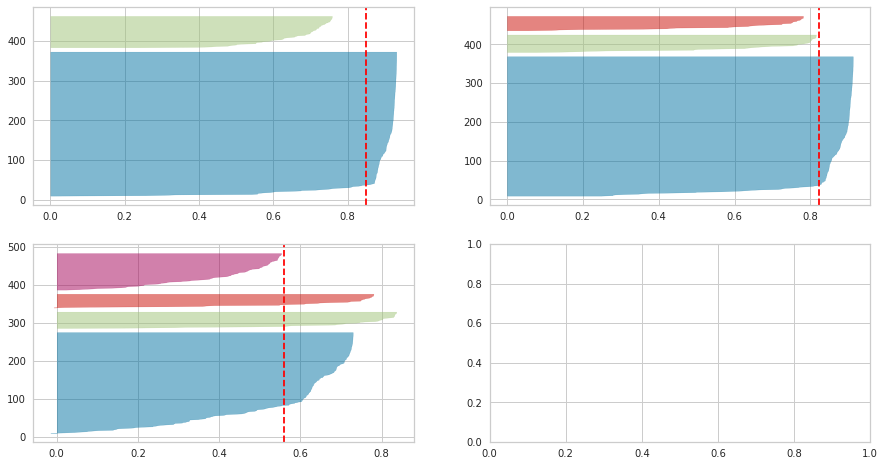

In [35]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df) 

##### A Silhouette visualizer with 2, 3 and 4 clusters shown 

##### Dotted red line = Average Silhouette score

### With 4 clusters , the average silhouette score falls lower than the previous 0.79. This means that adding an additional cluster could make some samples overlap with each other and we move further away from the optimal number of clusters

### The highest average silhouette score is shown on the graph with only 2 clusters at >0.8. This visulaizer shows me that the optimum number of clusters in this data package is 2.

### Overall, the silhouette analysis shows that there is one dominating cluster

[1] : https://vitalflux.com/kmeans-silhouette-score-explained-with-python-example/#:~:text=Silhouette%20score%20is%20used%20to,each%20sample%20of%20different%20clusters.